# BLEU

In [122]:
c1="it is a guide to action which ensures that the military always obeys the commands of the party"
c2="it is to insure the troops forever hearing the activity guidebook that party direct"

In [123]:
r1="it is a guide to action that ensures that the military will forever heed party commands"
r2="it is the guiding principle which guarantees the military forces always being under the command of the party"
r3="it is the practical guide for the army always to heed the directions of the party"

In [6]:
! pip install nltk
import nltk
nltk.download('punkt_tab')

from nltk import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [124]:
hypothesis = word_tokenize(c1)
reference = word_tokenize(r1)

In [8]:
hypothesis

['it',
 'is',
 'a',
 'guide',
 'to',
 'action',
 'which',
 'ensures',
 'that',
 'the',
 'military',
 'always',
 'obeys',
 'the',
 'commands',
 'of',
 'the',
 'party']

### Get clipped counts

In [11]:
from collections import defaultdict
def get_ngrams(sentence_toks,n):
  ngrams = defaultdict(int)
  for i in range(0,len(sentence_toks)-(n-1)):
    ngrams[str.join(" ",sentence_toks[i:i+n])]+=1
  return(ngrams)


In [14]:
get_ngrams(hypothesis,3)

defaultdict(int,
            {'it is a': 1,
             'is a guide': 1,
             'a guide to': 1,
             'guide to action': 1,
             'to action which': 1,
             'action which ensures': 1,
             'which ensures that': 1,
             'ensures that the': 1,
             'that the military': 1,
             'the military always': 1,
             'military always obeys': 1,
             'always obeys the': 1,
             'obeys the commands': 1,
             'the commands of': 1,
             'commands of the': 1,
             'of the party': 1})

In [18]:
def get_clipped_precision(h,r,n):
    counts = get_ngrams(h, n)
    reference_counts = get_ngrams(r, n)
    clipped_counts = [min(count, reference_counts[ngram]) for ngram, count in counts.items()]
    return(sum(clipped_counts)/sum(counts.values()))


In [72]:
import numpy as np
brev_pen=min(1,np.exp(1-len(reference)/len(hypothesis)))

### Depiction of brevity penalty as a function of proportional difference

In [41]:
x=[]
y=[]
for i in range(1,11):
   x.append(i/10)
   y.append(np.exp(1-10/i))

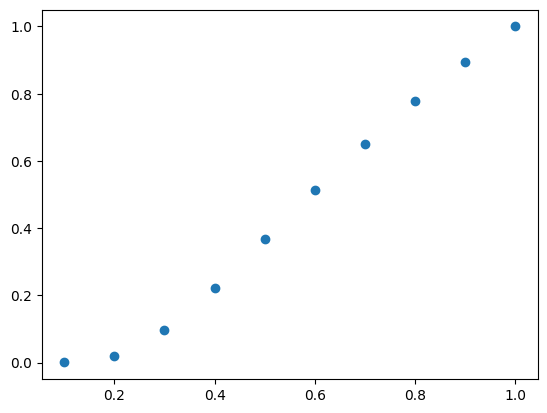

In [42]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

### Problem 1: Write code to calculate Bleu Score for c1 with r1 as the reference.

In [126]:
n = 4
tot=0
for i in range(1,n+1):
  tot += (1/n) * np.log(get_clipped_precision(hypothesis,reference,i))
brev_pen*np.exp(tot)


0.4208598069524091

Or calculate directly using NLTK function for full process (useful as a check)

In [129]:
nltk.translate.bleu_score.sentence_bleu([reference],hypothesis)

0.4208598069524091

## METEOR

In [84]:
import nltk
from nltk.translate import meteor
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import WordNetCorpusReader, wordnet

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [76]:
hypothesis = word_tokenize(c1)
reference = word_tokenize(r1)

In [ ]:
print(hypothesis)

['it', 'is', 'a', 'guide', 'to', 'action', 'which', 'ensures', 'that', 'the', 'military', 'always', 'obeys', 'the', 'commands', 'of', 'the', 'party']


In [ ]:
print(reference)

['it', 'is', 'a', 'guide', 'to', 'action', 'that', 'ensures', 'that', 'the', 'military', 'will', 'forever', 'heed', 'party', 'commands']


### Align to get matched words

In [77]:
enum_hypothesis_list, enum_reference_list = nltk.translate.meteor_score._generate_enums(hypothesis, reference)


In [78]:
print(enum_hypothesis_list), print(enum_reference_list)

[(0, 'it'), (1, 'is'), (2, 'a'), (3, 'guide'), (4, 'to'), (5, 'action'), (6, 'which'), (7, 'ensures'), (8, 'that'), (9, 'the'), (10, 'military'), (11, 'always'), (12, 'obeys'), (13, 'the'), (14, 'commands'), (15, 'of'), (16, 'the'), (17, 'party')]
[(0, 'it'), (1, 'is'), (2, 'a'), (3, 'guide'), (4, 'to'), (5, 'action'), (6, 'that'), (7, 'ensures'), (8, 'that'), (9, 'the'), (10, 'military'), (11, 'will'), (12, 'forever'), (13, 'heed'), (14, 'party'), (15, 'commands')]


(None, None)

In [87]:
matches_exact, ref_resid, hypo_resid =nltk.translate.meteor_score.exact_match(hypothesis,reference)
print(sorted(matches_exact))
print(ref_resid)
print(hypo_resid)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (7, 7), (8, 8), (10, 10), (14, 15), (16, 9), (17, 14)]
[(6, 'which'), (9, 'the'), (11, 'always'), (12, 'obeys'), (13, 'the'), (15, 'of')]
[(6, 'that'), (11, 'will'), (12, 'forever'), (13, 'heed')]


In [88]:
matches_stem, ref_resid, hypo_resid = nltk.translate.meteor_score._enum_stem_match(hypo_resid,ref_resid)
print(matches_stem)
print(ref_resid)
print(hypo_resid)

[]
[(6, 'that'), (11, 'will'), (12, 'forev'), (13, 'heed')]
[(6, 'which'), (9, 'the'), (11, 'alway'), (12, 'obey'), (13, 'the'), (15, 'of')]


In [89]:
matches_wn, ref_resid, hypo_resid = nltk.translate.meteor_score._enum_wordnetsyn_match(hypo_resid,ref_resid)
print(matches_wn)
print(ref_resid)
print(hypo_resid)

[]
[(6, 'which'), (9, 'the'), (11, 'alway'), (12, 'obey'), (13, 'the'), (15, 'of')]
[(6, 'that'), (11, 'will'), (12, 'forev'), (13, 'heed')]


In [90]:
matches= sorted(list(set(matches_exact + matches_stem + matches_wn)))
matches_count=len(set(matches_exact + matches_stem + matches_wn))
matches_count

12

### Count Chunks

In [95]:
def count_chunks(matches):
    chunks = 0
    for i in range(len(matches) - 1):
        if (matches[i + 1][0] == matches[i][0] + 1) and (matches[i + 1][1] == matches[i][1] + 1):
            chunks += 1
    return chunks

In [ ]:
count_chunks(matches)

6

### Problem 2: Write code to calculate Meteor Score for c1 with r1 as the reference.

In [100]:
def get_matches_count(h, r):
  matches_exact, ref_resid, hypo_resid =nltk.translate.meteor_score.exact_match(hypothesis,reference)
  matches_stem, ref_resid, hypo_resid = nltk.translate.meteor_score._enum_stem_match(hypo_resid,ref_resid)
  matches_wn, ref_resid, hypo_resid = nltk.translate.meteor_score._enum_wordnetsyn_match(hypo_resid,ref_resid)
  return(len(set(matches_exact + matches_stem + matches_wn)))



In [118]:
def calculate_meteor_score(h,r):
  #alpha=0.9
  beta= 3.0
  gamma = 0.5
  try:
    matched_count = get_matches_count(h, r)
    precision = matches_count / len(h)
    recall = matches_count / len(r)
    #fmean = (precision * recall) / (alpha * precision + (1 - alpha) * recall)
    fmean = (10*precision*recall)/(recall+(9*precision))
    chunk_count = count_chunks(matches)
    frag_frac = chunk_count / matches_count
  except ZeroDivisionError:
        return 0.0
  penalty = gamma * frag_frac**beta
  return (1 - penalty) * fmean

In [116]:
calculate_meteor_score(hypothesis,reference)

0.6944444444444444

Or calculate directly using NLTK function for full process (useful as a check)

In [117]:
nltk.translate.meteor([reference],hypothesis)

0.6944444444444445

### Problem 3: Come up with hypothesis/reference sentence pairs that demonstrate the relative strengths and weaknesses of the two scoring methods.